### 1 - Import test data

In [1]:
import pandas as pd
import pandas_ta as ta

df = pd.read_csv("EURUSD_Candlestick_5_M_ASK_30.09.2019-30.09.2022.csv")
df["Gmt time"]=df["Gmt time"].str.replace(".000","")
df['Gmt time']=pd.to_datetime(df['Gmt time'],format='%d.%m.%Y %H:%M:%S')
df=df[df.High!=df.Low]
df.set_index("Gmt time", inplace=True)

In [2]:
df["EMA"]=ta.ema(df.Close, length=30)
df['RSI']=ta.rsi(df.Close, length=10)
my_bbands = ta.bbands(df.Close, length=15, std=1.5)
df['ATR']=ta.atr(df.High, df.Low, df.Close, length=7)
df=df.join(my_bbands)
df

,Open,High,Low,Close,Volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5
Gmt time,,,,,,,,,,,,,
2019-09-30 00:00:00,1.09425,1.09426,1.09405,1.09406,585.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:05:00,1.09408,1.09414,1.09401,1.09409,289.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:10:00,1.09410,1.09423,1.09408,1.09410,276.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:15:00,1.09409,1.09410,1.09388,1.09389,439.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-30 00:20:00,1.09390,1.09395,1.09388,1.09395,341.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 20:35:00,0.98028,0.98034,0.98001,0.98022,624.12,0.980175,47.042955,0.000423,0.979757,0.980317,0.980877,0.114260,0.413104
2022-09-30 20:40:00,0.98023,0.98047,0.98007,0.98030,408.20,0.980183,49.010705,0.000420,0.979809,0.980344,0.980879,0.109099,0.458861
2022-09-30 20:45:00,0.98026,0.98034,0.98019,0.98031,317.29,0.980191,49.272498,0.000381,0.979943,0.980391,0.980838,0.091333,0.409912


In [3]:
def ema_signal(df, current_candle, backcandles):
    df_slice = df.reset_index().copy()

    df_slice = df_slice.loc[current_candle-backcandles:current_candle, ["Open", "Close", "EMA"]]
    dnt = 0 if (df_slice[["Open", "Close"]].max(axis=1) >= df_slice["EMA"]).any() else 1
    upt = 0 if (df_slice[["Open", "Close"]].min(axis=1) <= df_slice["EMA"]).any() else 1

    if upt==1 and dnt==1:
        return 3
    elif upt==1:
        return 2
    elif dnt==1:
        return 1
    else:
        return 0

df=df[-10000:-1]
#ema_signal(df, 1313, 5)
from tqdm import tqdm
tqdm.pandas()
df.reset_index(inplace=True)
#df['EMASignal'] = df.progress_apply(lambda row: ema_signal(df, row.name, 5) if row.name >= 20 else 0, axis=1)

In [4]:
def total_signal(df, current_candle, backcandles):
    if (ema_signal(df, current_candle, backcandles)==2
        and df.Close[current_candle]<=df['BBL_15_1.5'][current_candle]
        #and df.RSI[current_candle]<60
        ):
            return 2
    if (ema_signal(df, current_candle, backcandles)==1
        and df.Close[current_candle]>=df['BBU_15_1.5'][current_candle]
        #and df.RSI[current_candle]>40
        ):
    
            return 1
    return 0
        
df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:49<00:00, 201.79it/s]
C:\Users\Chinook\AppData\Local\Temp\ipykernel_12824\3699091765.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSignal'] = df.progress_apply(lambda row: total_signal(df, row.name, 7), axis=1)


In [5]:
df[df.TotalSignal != 0].head(10)

,Gmt time,Open,High,Low,Close,Volume,EMA,RSI,ATR,BBL_15_1.5,BBM_15_1.5,BBU_15_1.5,BBB_15_1.5,BBP_15_1.5,TotalSignal
3,2022-08-15 03:25:00,1.02478,1.02492,1.02474,1.02487,723.19,1.025030,51.979645,0.000268,1.024246,1.024556,1.024866,0.060462,1.006890,1
195,2022-08-15 19:25:00,1.01604,1.01622,1.01599,1.01621,623.47,1.016369,54.537906,0.000279,1.015592,1.015849,1.016107,0.050688,1.200441,1
293,2022-08-16 03:35:00,1.01663,1.01663,1.01640,1.01641,698.87,1.016361,46.162780,0.000240,1.016447,1.016647,1.016847,0.039376,-0.092859,2
294,2022-08-16 03:40:00,1.01642,1.01661,1.01630,1.01637,1161.57,1.016362,44.586991,0.000250,1.016410,1.016634,1.016858,0.044123,-0.088536,2
652,2022-08-17 09:35:00,1.01745,1.01761,1.01713,1.01713,1427.19,1.017122,47.561766,0.000515,1.017186,1.017533,1.017881,0.068357,-0.079871,2
889,2022-08-18 05:20:00,1.01699,1.01699,1.01682,1.01695,659.09,1.017154,49.819120,0.000208,1.016576,1.016751,1.016926,0.034434,1.069347,1
1006,2022-08-18 15:05:00,1.01308,1.01363,1.01302,1.01332,1645.71,1.013878,50.503320,0.000622,1.012089,1.012640,1.013191,0.108894,1.116665,1
1007,2022-08-18 15:10:00,1.01330,1.01365,1.01330,1.01353,1472.22,1.013856,53.697130,0.000583,1.012079,1.012714,1.013349,0.125405,1.142520,1
1046,2022-08-18 18:25:00,1.00859,1.00875,1.00849,1.00872,964.96,1.009391,47.259231,0.000330,1.008200,1.008421,1.008642,0.043837,1.177135,1
1047,2022-08-18 18:30:00,1.00871,1.00878,1.00854,1.00870,1208.78,1.009346,46.692514,0.000317,1.008192,1.008436,1.008680,0.048444,1.040403,1


In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
st=100
dfpl = df[st:st+350]
#dfpl.reset_index(inplace=True)
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close']),

                go.Scatter(x=dfpl.index, y=dfpl['BBL_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBL"),
                go.Scatter(x=dfpl.index, y=dfpl['BBU_15_1.5'], 
                           line=dict(color='green', width=1), 
                           name="BBU"),
                go.Scatter(x=dfpl.index, y=dfpl['EMA'], 
                           line=dict(color='black', width=1), 
                           name="EMA")           ])

fig.show()

In [7]:
def SIGNAL():
    return df.TotalSignal

In [11]:
from backtesting import Strategy
from backtesting import Backtest

class MyStrat(Strategy):
    mysize = 0.99
    slcoef = 1.2 #1.3
    TPSLRatio = 2 # 1.8
    def init(self):
        super().init()
        self.signal1 = self.I(SIGNAL)

    def next(self):
        super().next()
        slatr = self.slcoef*self.data.ATR[-1]
        TPSLRatio = self.TPSLRatio

        if len(self.trades)>0:
            if self.trades[-1].is_long and self.data.RSI[-1]>=90:
                self.trades[-1].close()
            elif self.trades[-1].is_short and self.data.RSI[-1]<=10:
                self.trades[-1].close()
        
        if self.signal1==2 and len(self.trades)==0:
            sl1 = self.data.Close[-1] - slatr
            tp1 = self.data.Close[-1] + slatr*TPSLRatio
            self.buy(sl=sl1, tp=tp1, size=self.mysize)
        
        elif self.signal1==1 and len(self.trades)==0:         
            sl1 = self.data.Close[-1] + slatr
            tp1 = self.data.Close[-1] - slatr*TPSLRatio
            self.sell(sl=sl1, tp=tp1, size=self.mysize)

bt = Backtest(df, MyStrat, cash=250, margin=1/30, commission=0.00)
stats, heatmap = bt.optimize(slcoef=[i/10 for i in range(10, 21)],
                    TPSLRatio=[i/10 for i in range(10, 21)], 
                    maximize='Return [%]', max_tries=300,
                        random_state=0,
                        return_heatmap=True)
stats

C:\Users\Chinook\AppData\Local\Temp\ipykernel_12824\2180651222.py:33: UserWarning:

Data index is not datetime. Assuming simple periods, but `pd.DateTimeIndex` is advised.



Start                                     0.0
End                                    9998.0
Duration                               9998.0
Exposure Time [%]                    5.570557
Equity Final [$]                   403.837337
Equity Peak [$]                    403.837337
Return [%]                          61.534935
Buy & Hold Return [%]               -4.364162
Return (Ann.) [%]                         0.0
Volatility (Ann.) [%]                     NaN
Sharpe Ratio                              NaN
Sortino Ratio                             NaN
Calmar Ratio                              0.0
Max. Drawdown [%]                  -11.609208
Avg. Drawdown [%]                   -2.504719
Max. Drawdown Duration                 2941.0
Avg. Drawdown Duration             245.148148
# Trades                                 52.0
Win Rate [%]                        42.307692
Best Trade [%]                       0.334812
Worst Trade [%]                     -0.096147
Avg. Trade [%]                    

In [12]:
stats["_strategy"]

<Strategy MyStrat(slcoef=1.2,TPSLRatio=2.0)>

In [9]:
bt.run()
bt.plot()

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_drag' property; using the latest value

f:\Python\Lib\site-packages\backtesting\_plotting.py:659: UserWarning:

found multiple competing values for 'toolbar.active_scroll' property; using the latest value



GridPlot(id='p1307', ...)

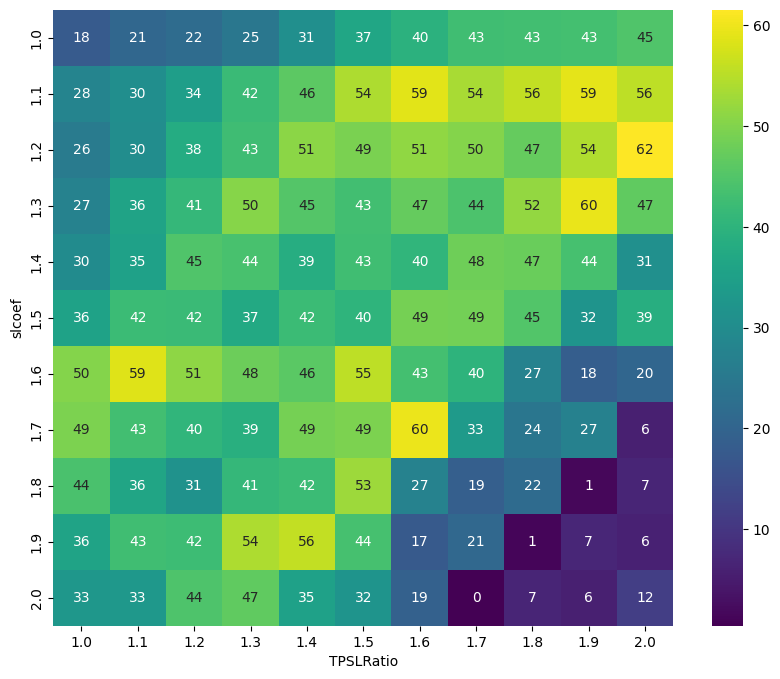

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert multiindex series to dataframe
heatmap_df = heatmap.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()